In [2]:
# Import numpy, pandas, seaborn, and matplotlib.pyplot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Types of Data

Data are often categorized into two distinct *types*:

* *Continuous*: the price of renting a flat for the weekend, or the distance from the flat to the city centre
* *Discrete*: the number of bedrooms that a flat has, or the neighbourhood the flat is in

More generally, continuous data can have an infinite number of possible values whereas discrete data are constrained to a finite number of possible values.

Discrete variables that have a notion of ordering (for instance, a survey that asks your satisfaction on a scale of 1 to 5) are called *ordinal*. Discrete variables that cannot directly be ordered are usually referred to as *categorical* variables (eg: countries or gender).

Note that when engineering features, one typically needs to pay special attention to discrete variables as many models are not equipped to handle this type of data, particularly if they are just categorical.

# Handling Categorical Features

If our data contains categorical features, before we can run any analysis, we must first represent them numerically. The standard approach is via a **one-hot encoding**.

A one-hot encoding takes as input the vector of discrete categorical values, and outputs a sparse matrix with 1s and 0s, where each column corresponds to one possible value of the feature.

For instance, suppose we are taking a trip to Amsterdam, and decide to do some data analysis to find the best location to book a flat. In such a case, the neighbourhood the flat is in may represented via a one-hot encoding.

As an example, let's consider the following trivial dataset:

$
\begin{array}{l|cc}
\text{Host} & \text{Neighbourhood} \\
\hline
\text{Tom} & \text{Oost} \\
\text{Dick} & \text{Museumkwartier} \\
\text{Harry} & \text{Oost} \\ 
\end{array}
$


In this case, there are two neighbourhoods `["Oost", "Museumkwartier"]` so the one-hot-encoding would correspond to the table:

$
\begin{array}{l|cc}
& \text{Oost} & \text{Museumkwartier} \\
\hline
\text{Tom} & 1 & 0 \\
\text{Dick} & 0 & 1 \\
\text{Harry} & 1 & 0 \\
\end{array}
$

## Loading the data and One-Hot Encoding

* Load the data `rental_500.csv` and have a look at it
* Select the column `host_neighbourhood` and assign it to a variable called `neighbourhood`
* Remove the country column from the initial dataset using `drop` or `del` (so that it is not in our way when applying scaling)
* Using the function `get_dummies()` from `pandas`, apply the one-hot-encoding
* Use `head()` to have a look and make sure it all makes sense

In [6]:
# add your code here
rental_df = pd.read_csv('data/rental_data.csv')
rental_df.head()

,host_neighbourhood,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
0,Indische Buurt,4,1.0,2,750,NaN,592,0,0.000000
1,Grachtengordel,2,1.0,1,100,80.0,700,61,5.083333
2,Grachtengordel,4,1.0,2,200,94.0,484,30,2.500000
3,Bos en Lommer,2,1.0,1,150,93.0,721,3,0.250000
4,Grachtengordel,6,2.0,3,420,98.0,1507,318,26.500000


In [7]:
neighbourhood = rental_df['host_neighbourhood']
del rental_df['host_neighbourhood']

neighbourhood = pd.get_dummies(neighbourhood)
neighbourhood.head()

,Bos en Lommer,De Pijp,Grachtengordel,Indische Buurt,Jordaan,Oost,Oosterparkbuurt,Oud-West,Rivierenbuurt
0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0


# Handling Continuous Features

Having looked at the categorical features in our data set, let us now turn our attention to the continous features. For the purposes of this notebook, we will assume all our features are continuous except for the `host_neighbourhood`

## Missing Values, Outliers, and Scaling

We are going to performance pre-processing and imputation on the continuous features, but before getting into how to deal with those things, let's try to compute some of the statistics that can otherwise be obtained using the `describe()` method. 

* `count`, `mean`, `min`, `max` you should be able to get without any difficulties (watch out for nans!)
* To get the `std` use `np.std` or the `.std` method from pandas
* To get the quantiles, use `np.percentile` or the `.percentile` method from pandas
* Check with the output from `describe` - it should be identical!

**Note**: methods from Pandas are usually preferable because they handle missing values. Apart from that the methods are identical.

In [8]:
# add your code here
print("Count:\n")

# There are many ways! Here we use the pandas count method :)
print(rental_df.count())


# This function allows to apply elementwise functions but only on non-nan values
# If you use pandas functionalities, you don't need this :) 
tolerant_funs = lambda x, fun: fun(x[~np.isnan(x)])

print("\nMeans (numpy):\n")
print(rental_df.
         apply(lambda x: tolerant_funs(x, np.mean)))

print("\nMeans (pandas):\n")
print(rental_df.mean())

print("\nStd (numpy):\n")
print(rental_df.
         apply(lambda x: tolerant_funs(x, np.std)))

print("\nStd (pandas):\n")
print(rental_df.std())

# You get the idea... for now let's just stick with pandas
print("\nMin (pandas):\n")
print(rental_df.min())
print("\nMax (pandas):\n")
print(rental_df.max())
print("\n25% Percentile (pandas):\n")
print(rental_df.quantile(0.25))

Count:

accommodates            410
bathrooms               410
bedrooms                410
price                   410
review_scores_rating    402
square_feet             410
number_of_reviews       410
reviews_per_month       410
dtype: int64

Means (numpy):

accommodates              3.126829
bathrooms                 1.151220
bedrooms                  1.604878
price                   161.931707
review_scores_rating     95.194030
square_feet             507.439024
number_of_reviews        71.243902
reviews_per_month         5.936992
dtype: float64

Means (pandas):

accommodates              3.126829
bathrooms                 1.151220
bedrooms                  1.604878
price                   161.931707
review_scores_rating     95.194030
square_feet             507.439024
number_of_reviews        71.243902
reviews_per_month         5.936992
dtype: float64

Std (numpy):

accommodates              1.830237
bathrooms                 0.386114
bedrooms                  1.233664
price     

## Missing values

You may have noticed that in the data there were a number of missing values (`NaN`).

When pre-processing, it is essential to check whether there are any, and:

* Whether these missing values are informative or not
* Whether you can replace the missing values in a sensible way or not

Let's investigate. First, check which column has missing values, and how many.

* Apply the `isnull()` method on the data frame, this returns a dataframe similar to the original one but where every entry is just `True` or `False`
* Then, on the resulting dataframe, apply the `sum()` method which counts how many entries in the column are `True`

In [9]:
# add your code here
print(pd.isnull(rental_df).sum())

accommodates            0
bathrooms               0
bedrooms                0
price                   0
review_scores_rating    8
square_feet             0
number_of_reviews       0
reviews_per_month       0
dtype: int64


*Real-world data sets are often infamous for their poor quality; errors and missing values abound. So we are quite lucky to have only 8 missing values here.*

In general, when columns have missing data, we have a few choices on how to handle them. This process is typically called *imputation*.

### Imputation 

There are a number strategies to deal with missing data and our choice will often depend on whether the missing data is numeric or categorical. Some frequently used strategies include:

* Simply removing rows with missing data (e.g. `dropna()` can achieve this)
* Impute the values with a summary statistic such as the mean, or median, or most frequent value (e.g. `Imputer` from `sklearn` module)
* Replace the values with a sensible estimate

Note that deciding which strategy is best for your problem will very much depend on the specifics of your dataset. 

In the current case, the missing values are exclusively found in the `review_scores_rating` column, so let's inspect the rows where these values occur to see if we can gain any insight into what might be causing these missing values.

* Select the flats for which `review_scores_rating` is null. For this, use `isnull()` on the appropriate column and feed it as row indices to the dataframe to retrieve a subdataframe only corresponding to those flats
* Check the shape, make sure it worked!
* Inspect the resulting dataframe, can you spot anything strange? 

In [10]:
# extract the customers that have nan values
nan_flats = rental_df[pd.isnull(rental_df['review_scores_rating'])]

# How many nan cases do we have? 
print(nan_flats.shape)

# Let's have a quick look
nan_flats.head()


(8, 8)


,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
0,4,1.0,2,750,NaN,592,0,0.0
103,4,1.0,1,130,NaN,700,0,0.0
136,2,1.0,1,150,NaN,753,0,0.0
307,4,2.5,2,250,NaN,215,0,0.0
311,3,1.0,2,120,NaN,807,0,0.0


Note that `number_of_reviews` is equal to `0` for the rows which have missing values for their `review_scores_rating`.

There is a fairly obvious interpretation for this: since these flats have not yet recevied any reviews, they have not yet been rated.

In this case, we decide to fill the missing values with `0`, which can be easily implemented using the `fillna()` function (this is a **fairly reckless** decision but, again, this notebook is more focused on tools and techniques):

* Replace the column `review_scores_rating` with the same column but where missing values are filled with value `0` using the `fillna()` method applied on the column
* Use `head()` to check

In [11]:
# your code here
rental_df['review_scores_rating'] = rental_df['review_scores_rating'].fillna(0)
rental_df.head()

,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
0,4,1.0,2,750,0.0,592,0,0.000000
1,2,1.0,1,100,80.0,700,61,5.083333
2,4,1.0,2,200,94.0,484,30,2.500000
3,2,1.0,1,150,93.0,721,3,0.250000
4,6,2.0,3,420,98.0,1507,318,26.500000


## Removing Outliers

Outliers are observations that appear extreme relative to the bulk of the data. It's important to take these into account during the pre-processing stage because a number of Machine Learning techniques are sensitive to outliers. 

Let's first have a look at the feature `price`.

In doing so, we will use the `seaborn` wrapper around `matplotlib` which is great for producing clear plots when looking at data. Have a look [here](https://stanford.edu/~mwaskom/software/seaborn/examples/index.html) for a gallery of plots possible with `seaborn`.

* Filter the `rental_df` dataframe by the `price` column and assign to a variable called `data`
* Define a figure environment with the `figure()` method of `matplotlib.pylab` (you can pass a figure size, such as (8,6))
* Use the `distplot` and `boxplot` functions of `seaborn` on the data variable
* Does it look like there are outliers, and what would be an appropriate way to address this? 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


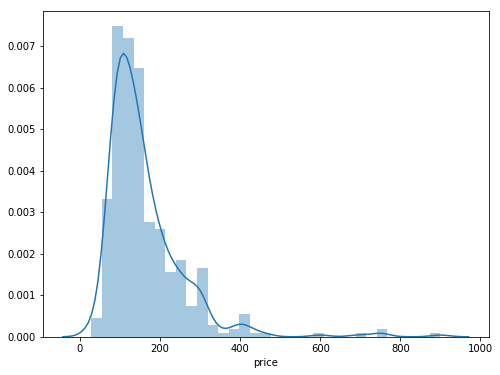

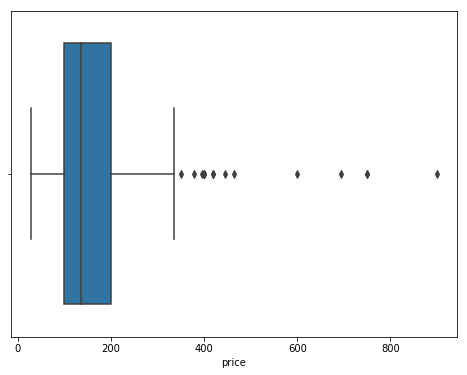

In [12]:
# add your code here
data = rental_df['price']
data = data[data > 0]

plt.figure(figsize=(8, 6))
sns.distplot(data)

plt.figure(figsize=(8, 6))
sns.boxplot(data)

### Naive outlier removal 

Here we show how you can get rid of outliers, if that is what you decide is best for your data.

There are a number of ways to define outliers. One simple approach is to treat all points more than `k` standard deviations (`sigma`, $\sigma$) away from the mean (`mu`, $\mu$) as outliers.

Does such a metric make sense for the feature above?

Below is a simple function that takes data and a value of `k` (the number of standard deviations), and filters out all values that lie outside the range $[\mu-k\sigma, \mu+k\sigma]$.

In [14]:
# This function takes a pandas Series and filters out all elements that are outside
# the range [mu-k*sigma , mu+k*sigma]

def remove_outliers(data, k=3):
    mu       = data.mean() # get the mean
    sigma    = data.std()  # get the standard deviation
    filtered = data[(mu - k*sigma < data) & (data < mu + k*sigma)]
    return filtered


This `remove_outliers()` can be applied to your dataframe using the `apply()` method.

* In rows where a value is declared an outlier, its value is replaced with `NaN`, which keeps the structure of our initial dataframe intact.
* Then remove the lines with `NaN` values (that correspond to lines with outliers). For this, use the `dropna()` method on the dataframe. 

In [15]:
# add your code here
rental_df = rental_df.apply(remove_outliers)
rental_df = rental_df.dropna()
rental_df.head()

,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
1,2.0,1.0,1.0,100.0,80.0,700.0,61.0,5.083333
2,4.0,1.0,2.0,200.0,94.0,484.0,30.0,2.500000
3,2.0,1.0,1.0,150.0,93.0,721.0,3.0,0.250000
4,6.0,2.0,3.0,420.0,98.0,1507.0,318.0,26.500000
5,2.0,1.5,1.0,78.0,93.0,226.0,74.0,6.166667


## Scaling

Standardization is a common requirement of many Machine Learning methods. Such algorithms often assume that all features are centered around zero and have variance in the same order. If one feature has a variance that is orders of magnitude larger than others, it may reduce the ability of the algorithm to learn from other features.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In the case of our data set, the different features have completely different scales. This becomes particularly obvious when considering a boxplot of the features. 

* Define a figure environment with the `figure()` method of `matplotlib.pylab` 
* Use the `boxplot` function of `seaborn` specifying the appropriate dataframe

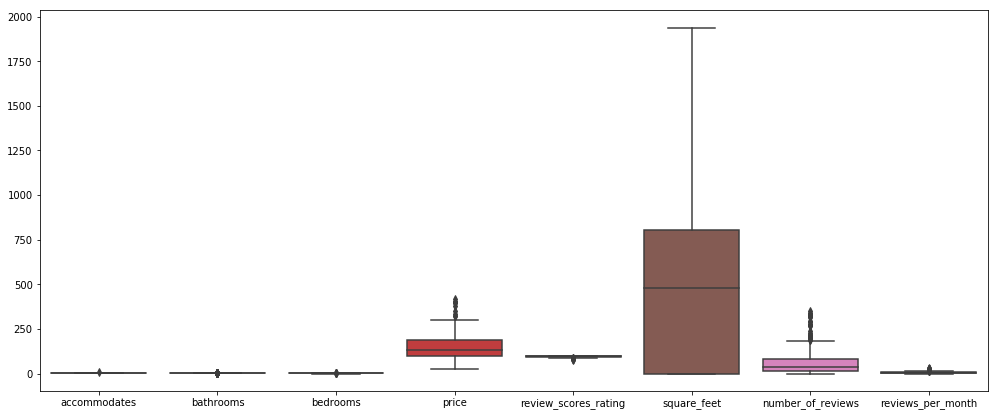

In [16]:
# Plot a sns.boxplot() of the customer dataframe, but just take the first
plt.figure(figsize=(17, 7))
sns.boxplot(data=rental_df)

We can see that `bedrooms` is defined in a much narrower space than `price` or `square_feet`. If we were to use the data in its current form, the effect of `square_feet` could be disproportionnaly high and cause a Machine Learning algorithm to underperform. 

To account for this, it is good practice to center and scale your data, so that all the dimensions fall onto a comparable interval.

* Define a 'scaler' using the `StandardScaler` class imported from `sklearn.preprocessing` (you could also use the `MinMaxScaler`, but `StandardScaler` is more common)
* Apply it on the dataframe using the `fit_transform` method 
* Define a new dataframe (`rental`) similar to the original one but with scaled columns (make sure you specify the `columns` and `index` of the new dataframe using the previous dataframe's `columns` and `index)

In [18]:
# add your code here
from sklearn.preprocessing import StandardScaler

# Initialise the scaler
scaler = StandardScaler() 

# Apply auto-scaling (or any other type of scaling) and cast to DataFrame 
rental = pd.DataFrame(
                    scaler.fit_transform(rental_df), 
                    columns = rental_df.columns, 
                    index = rental_df.index)

# Print the first rows
rental.head()

,accommodates,bathrooms,bedrooms,price,review_scores_rating,square_feet,number_of_reviews,reviews_per_month
1,-0.817853,-0.410740,-0.603432,-0.736934,-3.867292,0.415669,0.005542,0.005542
2,0.954554,-0.410740,0.623003,0.651696,-0.289537,-0.028113,-0.430920,-0.430920
3,-0.817853,-0.410740,-0.603432,-0.042619,-0.545091,0.458814,-0.811064,-0.811064
4,2.726962,3.266357,1.849439,3.706683,0.732679,2.073688,3.623953,3.623953
5,-0.817853,1.427809,-0.603432,-1.042433,-0.545091,-0.558186,0.188574,0.188574


Now if we replot the `boxplot`we can see that all the features have most of the 'main' (the bulk of their observed values) in the same range. 

Does scaling change the distribution of our features? Or can you still observe some skew?

Replot the `boxplot` with the scaled data. Observe that now all the features have most of their "mass" (main part of their observed values) in the same range. Note though that scaling does not change the distribution of features and you can still observe that some features are heavily skewed.

* Define a figure environment with the `figure()` method of `matplotlib.pylab` 
* Use the `boxplot` function of `seaborn` specifying the `rental` dataframe

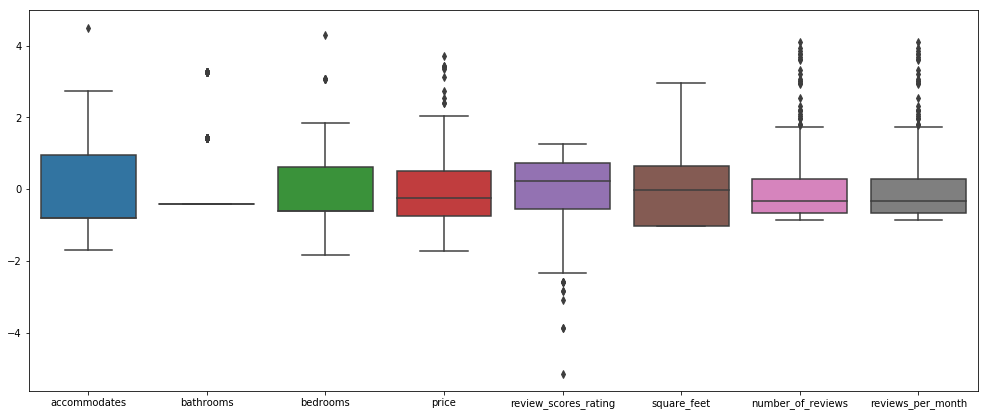

In [19]:
# replot the boxplot with the scaled data
plt.figure(figsize=(17, 7))
sns.boxplot(data=rental)

Now that we've completed this initial pre-processing, let us save the data for future use.

* Use the `to_csv()` method on the `rental` dataframe
* Set the name to `rental_data_continuous.csv`
* Do the same with the `neighbourhood` dataframe, call it `retail_data_categorical.csv`

In [20]:
# add your code to save the dataframe
rental.to_csv('data/rental_data_continuous.csv', index=False)
neighbourhood.to_csv('data/rental_data_categorical.csv', index=False)

## Relationship between input features

Remember that our ultimate aim was to decide on a flat for our visit to Amsterdam. Having now run some pre-processing methods on our data, we can inspect the relationship between our features to get an idea of how we might wish to continue with our data analysis.

### Correlation Matrix

It is often of great interest to investigate whether any of the variables in a multivariate dataset are significantly **correlated**. It is likely that some of our variables in the `rental` dataframe are related to each other. For instance, a larger flat is likely to have more bedrooms, more bathrooms, and to cost more.

To quickly identify which features are related and to what degree, it is useful to compute a **correlation matrix** that contains the correlation coefficient for each pair of variables. 

Remember that the correlation coefficient between two features $f_1$ and $f_2$ each corresponding to $n$ instances is given by

$$\rho_{f_1, f_2} = {\text{cov}(f_1, f_2)\over \sqrt{\text{var}(f_1)}\sqrt{\text{var}(f_2)}} = c_\text{sim}(f_1-\overline f_1, f_2-\overline f_2)$$

where $\overline f_1$ is the mean of $f_1$. If you want to compute this coefficient explicitly for two features, you can use `np.corrcoeff`, this will return a matrix (normalised covariance). For example:

```python
n  = 5000
f1 = np.random.randn(n)
f2 = np.random.randn(n)

c = np.corrcoef(f1, f2)[0, 1]

mf1 = f1.mean()
mf2 = f2.mean()
num = np.dot(f1 - mf1, f2 -mf2)
den = np.linalg.norm(f1) * np.linalg.norm(f2)

c_manual = num / den

print("Correlation Coefficient: ({0:.4f}) - ({0:.4f})".format(c, c_manual))
```

* Compute the correlation coefficient for all pairs of features in a pandas dataframe
* For this, the `corr()` function from the `pandas` library can be used
* You can then use `heatmap` from `seaborn` to display the correlation matrix


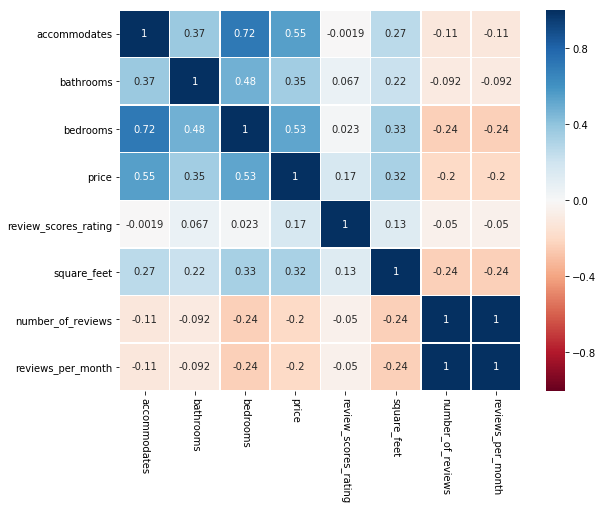

In [21]:
# add your code here to compute the correlation matrix
corrmat = rental.corr()

# add your code here to visualise the correlation matrix using sns.heatmap
plt.figure(figsize=(9,7))
sns.heatmap(corrmat, 
            linewidths=0.5, 
            cmap="RdBu", 
            vmin=-1, 
            vmax=1, 
            annot=True)

plt.xticks(rotation=270);

### Dimensional Reduction

#### Variance thresholding

Just as we previously applied a scalar to mitigate the detrimental impact any high variance features might have on any modeling we may wish to implement, so too should we consider removing features with low variance.

Variance thresholding is one simple approach to achieve this. Importantly, this thresholding does not take any classification into account, so we are examining the variance for a given feature across samples, not the variance relative to any output or class.

Variance thresholding is implemented as a transformer object in `scikit-learn` with a number of different options.

* Join the `neighbourhood` dataframe corresponding to the one-hot encoding to the `rental` dataframe
* Create an object of the `VarianceThreshold` class from `sklearn.feature_selection` to select the subset of features with variance of at least `0.5`
* Run the `fit()` method on the object and then use the `get_support()` method to return an array of True/False for which columns pass the threshold

In [22]:
# add your code here to load VarianceThreshold and join the dataframes
from sklearn.feature_selection import VarianceThreshold

# joining the dataframes
rental_neighbourhood = rental.join(neighbourhood)

# add your code to create an instance of VarianceThreshold and fit it to customers
sel = VarianceThreshold(threshold=0.5)
sel.fit(rental_neighbourhood)

# com+ retrieve and display the columns that do not go through the filter
columns_to_keep = sel.get_support()

print(rental_neighbourhood.columns[~columns_to_keep]) # columns that will in fact be removed

Index(['Bos en Lommer', 'De Pijp', 'Grachtengordel', 'Indische Buurt',
       'Jordaan', 'Oost', 'Oosterparkbuurt', 'Oud-West', 'Rivierenbuurt'],
      dtype='object')


*Which features would be removed based on this strategy? Are they continuous or categorical? Does this suggest any drawbacks to this method?*

Other methods for variance thresholding (including ones that use correlation with the class(es) of interest) are available. Further reading on these methods can be found [in the sklearn documentation](http://scikit-learn.org/stable/modules/feature_selection.html#variance-threshold).

### Plotting the Relationship Between Features

As well as inspecting correlations and removing low-variance features, an essential tool for inspecting processed features and running exploratory data analysis is the **scatter plot**.

This plot helps visualise the relationship between two input features. It may also give you a first indication of the Machine Learning model that could be applied and its complexity (linear vs. non-linear). 

Given the small number of features, you can have a look at the `pairplot` of all of the features: a grid where each pair of feature is displayed against the other. This can help seeing the correlations present in your data. 

* Use `sns.pairplot` on the `rental` dataFrame to visualise this
* Can you interpret some of the relations that appear in the grid?

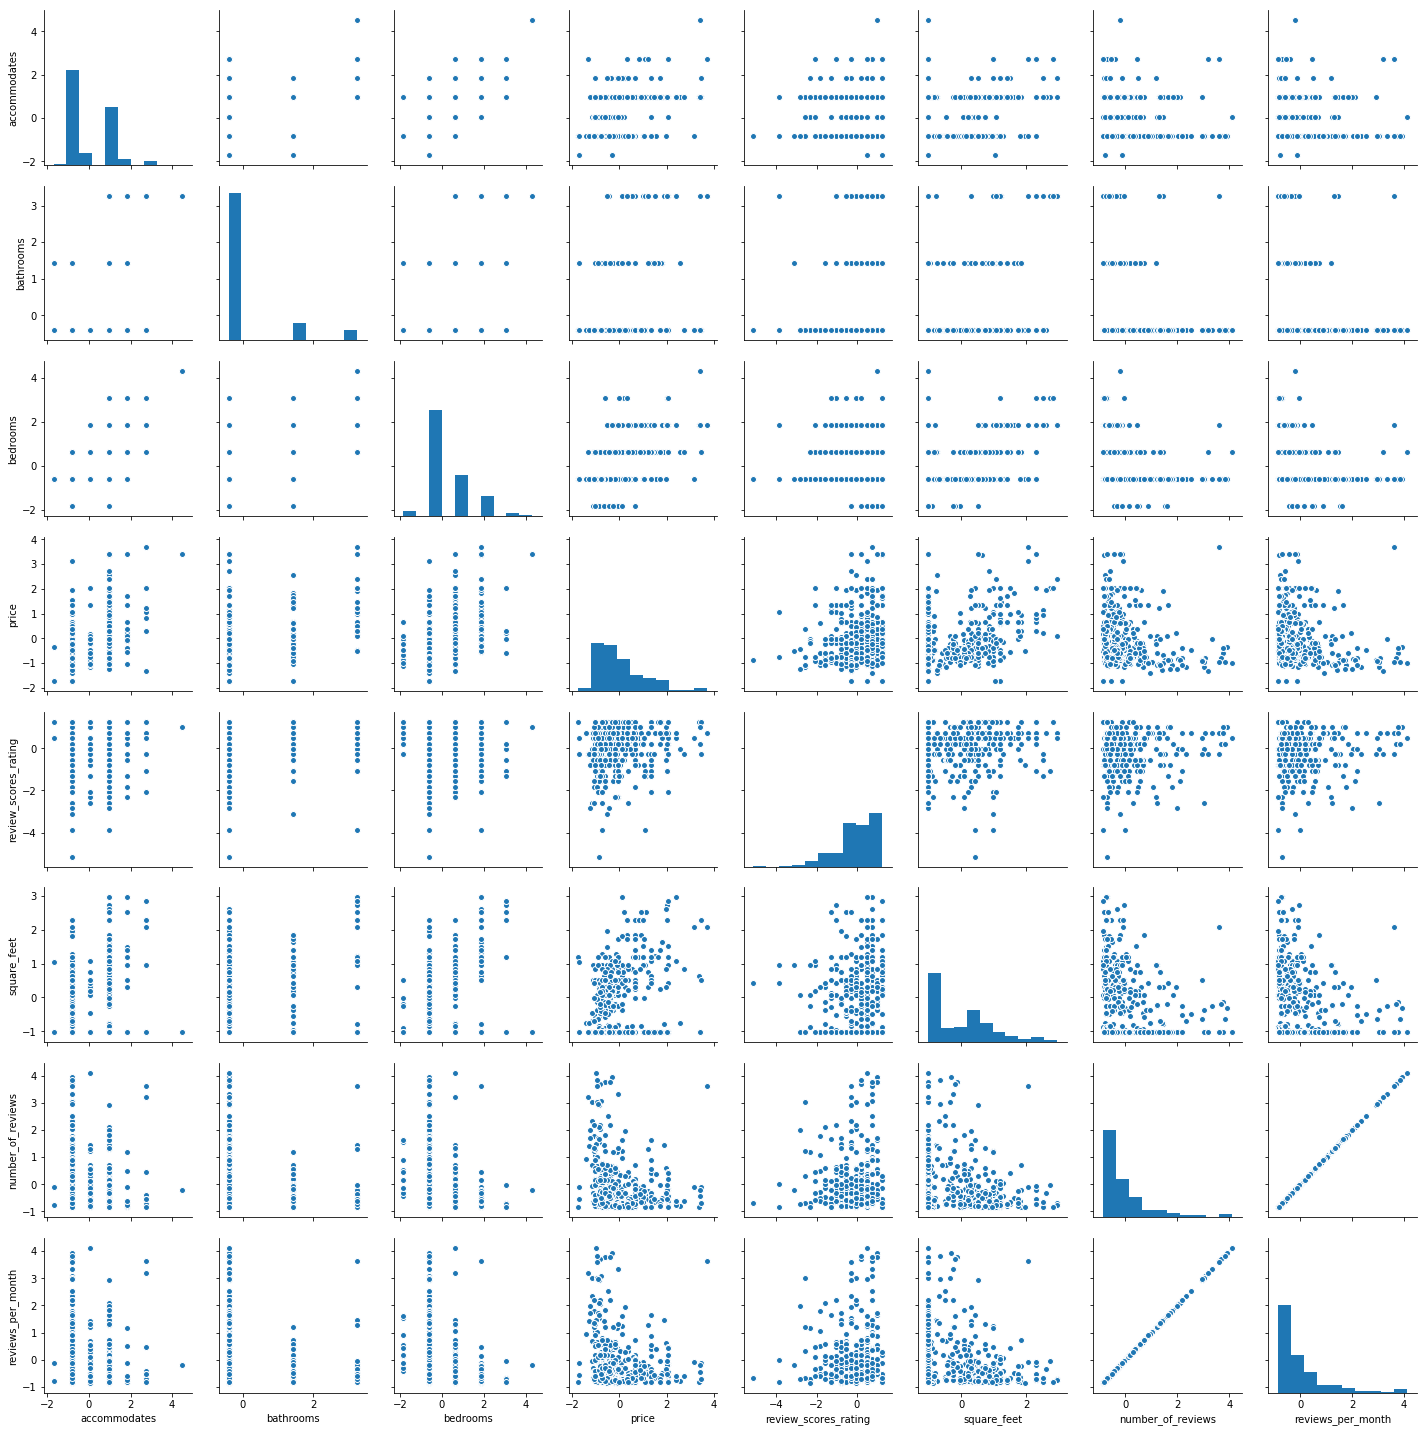

In [23]:
sns.pairplot(rental)